In [1]:
import ROOT
import dask_awkward as dak
import numpy as np

Welcome to JupyROOT 6.30/04


In [2]:
def setTDRStyle():
  ROOT.gStyle.SetCanvasBorderMode(0);
  ROOT.gStyle.SetCanvasColor(0);
  ROOT.gStyle.SetCanvasDefH(600);
  ROOT.gStyle.SetCanvasDefW(600);
  ROOT.gStyle.SetCanvasDefX(0);
  ROOT.gStyle.SetCanvasDefY(0);

  ROOT.gStyle.SetPadBorderMode(0);
  ROOT.gStyle.SetPadColor(0); 
  ROOT.gStyle.SetPadGridX(0);
  ROOT.gStyle.SetPadGridY(0);
  ROOT.gStyle.SetGridColor(0);
  ROOT.gStyle.SetGridStyle(3);
  ROOT.gStyle.SetGridWidth(1);

  ROOT.gStyle.SetFrameBorderMode(0);
  ROOT.gStyle.SetFrameBorderSize(1);
  ROOT.gStyle.SetFrameFillColor(0);
  ROOT.gStyle.SetFrameFillStyle(0);
  ROOT.gStyle.SetFrameLineColor(1);
  ROOT.gStyle.SetFrameLineStyle(1);
  ROOT.gStyle.SetFrameLineWidth(1);
  ROOT.gStyle.SetHistLineColor(1);
  ROOT.gStyle.SetHistLineStyle(0);
  ROOT.gStyle.SetHistLineWidth(1);

  ROOT.gStyle.SetEndErrorSize(2);
  ROOT.gStyle.SetFuncColor(2);
  ROOT.gStyle.SetFuncStyle(1);
  ROOT.gStyle.SetFuncWidth(1);
  ROOT.gStyle.SetOptDate(0);
  
  ROOT.gStyle.SetOptFile(0);
  ROOT.gStyle.SetOptStat(0);
  ROOT.gStyle.SetStatColor(0); 
  ROOT.gStyle.SetStatFont(42);
  ROOT.gStyle.SetStatFontSize(0.04);
  ROOT.gStyle.SetStatTextColor(1);
  ROOT.gStyle.SetStatFormat("6.4g");
  ROOT.gStyle.SetStatBorderSize(1);
  ROOT.gStyle.SetStatH(0.1);
  ROOT.gStyle.SetStatW(0.15);

  ROOT.gStyle.SetPadTopMargin(0.07);
  ROOT.gStyle.SetPadBottomMargin(0.13);
  ROOT.gStyle.SetPadLeftMargin(0.12);
  ROOT.gStyle.SetPadRightMargin(0.05);

  ROOT.gStyle.SetOptTitle(0);
  ROOT.gStyle.SetTitleFont(42);
  ROOT.gStyle.SetTitleColor(1);
  ROOT.gStyle.SetTitleTextColor(1);
  ROOT.gStyle.SetTitleFillColor(10);
  ROOT.gStyle.SetTitleFontSize(0.05);

  ROOT.gStyle.SetTitleColor(1, "XYZ");
  ROOT.gStyle.SetTitleFont(42, "XYZ");
  ROOT.gStyle.SetTitleSize(0.05, "XYZ");
  ROOT.gStyle.SetTitleXOffset(0.9);
  ROOT.gStyle.SetTitleYOffset(1.05);
 
  ROOT.gStyle.SetLabelColor(1, "XYZ");
  ROOT.gStyle.SetLabelFont(42, "XYZ");
  ROOT.gStyle.SetLabelOffset(0.007, "XYZ");
  ROOT.gStyle.SetLabelSize(0.04, "XYZ");

  ROOT.gStyle.SetAxisColor(1, "XYZ");
  ROOT.gStyle.SetStripDecimals(1); 
  ROOT.gStyle.SetTickLength(0.025, "XYZ");
  ROOT.gStyle.SetNdivisions(510, "XYZ");
  ROOT.gStyle.SetPadTickX(1); 
  ROOT.gStyle.SetPadTickY(1);

  ROOT.gStyle.SetOptLogx(0);
  ROOT.gStyle.SetOptLogy(0);
  ROOT.gStyle.SetOptLogz(0);

  ROOT.gStyle.SetPaperSize(20.,20.);
  ROOT.gStyle.SetPaintTextFormat(".2f");



In [3]:
def CMS_lumi( pad,  lumi,  up = False,  skipPreliminary = True, reduceSize = False, offset = 0,offsetLumi = 0):
  latex2 =ROOT.TLatex();
  latex2.SetNDC();
  latex2.SetTextSize(0.6*pad.GetTopMargin());
  latex2.SetTextFont(42);
  latex2.SetTextAlign(31);
  if(reduceSize):
    latex2.SetTextSize(0.5*pad.GetTopMargin());
  
  if(lumi != ""):
    latex2.DrawLatex(0.94+offsetLumi, 0.95,(lumi+" fb^{-1} (13 TeV)"));
  else:
    latex2.DrawLatex(0.88+offsetLumi, 0.95,(lumi+"(13 TeV)"));

  if(up):
    latex2.SetTextSize(0.65*pad.GetTopMargin());
    if(reduceSize):
      latex2.SetTextSize(0.5*pad.GetTopMargin());
    latex2.SetTextFont(62);
    latex2.SetTextAlign(11);    
    latex2.DrawLatex(0.15+offset, 0.95, "CMS");
  else:
    latex2.SetTextSize(0.6*pad.GetTopMargin());
    if(reduceSize):
      latex2.SetTextSize(0.45*pad.GetTopMargin());
    elif(reduceSize == 2):
      latex2.SetTextSize(0.40*pad.GetTopMargin());

    latex2.SetTextFont(62);
    latex2.SetTextAlign(11);    
    latex2.DrawLatex(0.175+offset, 0.86, "CMS");

  if(not skipPreliminary):
    
    if(up):
      latex2.SetTextSize(0.55*pad.GetTopMargin());
      latex2.SetTextFont(52);
      latex2.SetTextAlign(11);
      latex2.DrawLatex(0.235+offset, 0.95, "Preliminary");
    
    else:
      latex2.SetTextSize(0.6*pad.GetTopMargin());
      if(reduceSize):
          latex2.SetTextSize(0.45*pad.GetTopMargin());
      latex2.SetTextFont(52);
      latex2.SetTextAlign(11);    
      if(reduceSize):
          latex2.DrawLatex(0.235+offset, 0.86, "Preliminary");
      else:
          latex2.DrawLatex(0.28+offset, 0.86, "Preliminary");

In [4]:
#Plotting part
setTDRStyle()
canvas = ROOT.TCanvas("canvas","",600,750);
canvas.cd();

pad = ROOT.TPad("pad","pad",0,0.,1,1);
pad.SetFillColor(0);
pad.SetFillStyle(0);
pad.SetTickx(1);
pad.SetTicky(1);
pad.SetBottomMargin(0.3);
pad.SetRightMargin(0.06);
pad.Draw();
pad.cd();

# # Background histograms
# hs = ROOT.THStack("hs", "");
# hist_zjets = hist_dyjets.at(iobs).Clone("histo_zjets");

In [5]:
leg = ROOT.TLegend(0.40,0.70,0.96,0.9)
leg.SetFillColor(0);
leg.SetFillStyle(0);
leg.SetBorderSize(0);
leg.SetNColumns(2);

In [6]:
import json
with open("./histogram/plot_settings.json", "r") as file:
    plot_settings = json.load(file)
# available_processes = ["data_A","vbf_powheg"]
available_processes = ["vbf_powheg", "data_A"]
# process = "vbf_powheg"
load_path = "/depot/cms/users/yun79/results/stage1/test_full"
load_path = load_path + f"/f0_1"
# color_map= {
#     "vbf_powheg" : 
# }
var = "jet1_pt"
binning = np.linspace(*plot_settings[var]["binning_linspace"])
data_hists = []
mc_hists = []
# dummy_hist.Draw("hist");

for process in available_processes:
    print(f"process: {process}")
    full_load_path = load_path+f"/{process}/*/*.parquet"
    events = dak.from_parquet(full_load_path) 
    
    np_hist, _ = np.histogram(events[var].compute(), bins=binning)
    jet1_pt_hist = ROOT.TH1F( 'jet1_pt_hist'+process, 'jet1_pt'+process, len(binning)-1, min(binning), max(binning))
    for idx in range (len(np_hist)):
        jet1_pt_hist.SetBinContent(1+idx, np_hist[idx])
    if "data" in process:
        print("data activated")
        # print(f"jet1_pt_hist: {jet1_pt_hist.GetBinContent(2)}")
        # jet1_pt_hist.GetXaxis().SetTitle("obs");
        # jet1_pt_hist.SetMarkerStyle(20);
        # jet1_pt_hist.SetMarkerSize(1);
        # jet1_pt_hist.SetMarkerColor(1);
        # jet1_pt_hist.SetLineColor(1);
        data_hists.append(jet1_pt_hist)
        # jet1_pt_hist.GetYaxis().SetRangeUser(0.,10e9);
        # jet1_pt_hist.Draw("EPsame");
        # jet1_pt_hist.Draw("ehist");
    else:
        # pass
        # print("mc activated")
        # jet1_pt_hist.SetFillColor(ROOT.kBlue);
        # jet1_pt_hist.SetLineColor(1);
        # jet1_pt_hist.Draw("hist same")
        mc_hists.append(jet1_pt_hist)
        
    
    # leg.AddEntry(jet1_pt_hist, process,"PEL");


process: vbf_powheg
process: data_A
data activated


In [7]:
# dummy_hist = ROOT.TH1F('dummy_hist', "dummy", len(binning)-1, min(binning), max(binning))
dummy_hist = data_hists[0].Clone("temp");
dummy_hist.GetXaxis().SetTitleSize(0);
dummy_hist.GetXaxis().SetLabelSize(0);
dummy_hist.GetYaxis().SetRangeUser(0.,10e9);
dummy_hist.Draw("EP");
for mc_hist in mc_hists:
    mc_hist.SetFillColor(ROOT.kBlue);
    mc_hist.SetLineColor(1);
    mc_hist.Draw("hist same");
for data_hist in data_hists:
    data_hist.SetMarkerStyle(20);
    data_hist.SetMarkerSize(1);
    data_hist.SetMarkerColor(1);
    data_hist.SetLineColor(1);
    data_hist.Draw("EPsame");

Info in <TCanvas::Print>: pdf file test.pdf has been created


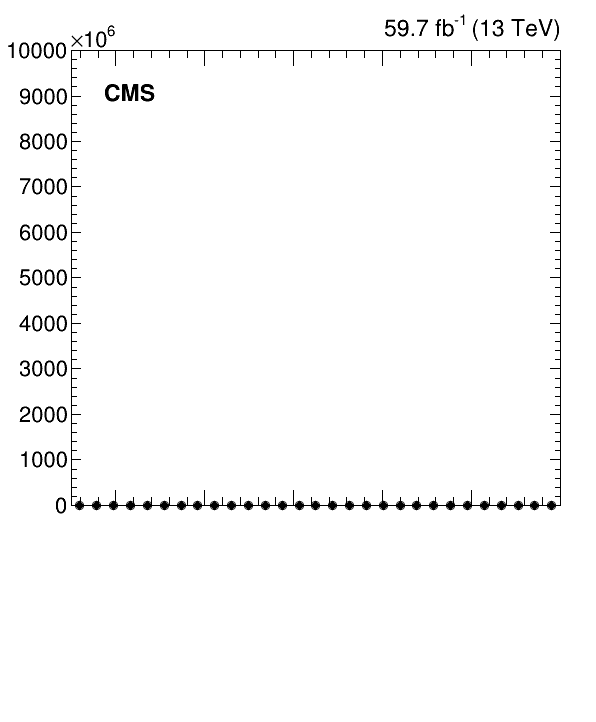

In [8]:
# leg.Draw("same");
CMS_lumi(canvas, "59.7");
pad.RedrawAxis("sameaxis");
pad.cd();
dummy_hist.GetYaxis().SetRangeUser(0.,10e9);
# pad.SetLogy();
pad.Modified();
pad.Update();
pad.RedrawAxis("sameaxis");
canvas.SaveAs("test.pdf");

In [47]:
# print(jet1_pt_hist.GetXaxis().GetBinLowEdge(len(edges)+1))
# print(jet1_pt_hist.GetBinContent(len(edges)))
# print(np_hist[len(edges)])
# # max(edges)

In [49]:
import dask_awkward as dak
import awkward as ak
import uproot
import numpy as np
process = "vbf_powheg"
load_path = "/depot/cms/users/yun79/results/stage1/test_full"
load_path = load_path + f"/f0_1"
full_load_path = load_path+f"/{process}/*/*.parquet"
events = dak.from_parquet(full_load_path) 
var = "jet1_pt"
np_hist, edges = np.histogram(events[var].compute(), bins=np.linspace(*plot_settings[var]["binning_linspace"]))

In [74]:
jet1_pt_hist.GetBinContent(2)
# jet1_pt_hist.GetXaxis().GetBinLowEdge(2)

40.0

In [73]:
np_hist

<Array [6, 40, 203, 647, 1.19e+03, ..., 271, 252, 199, 182] type='29 * float64'>

In [63]:
# jet1_pt_hist.GetBinContent(1)
jet1_pt_hist.GetBinContent(2)

0.0

In [52]:
max(edges)

300.0

In [55]:
len(np_hist)

29